# Regression Demo

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as manimation
import timeit
start = timeit.default_timer()

## input fake data
### linspace(x,y,z) 創建一個矩陣,最小值為x,最大值為y,其中分z個間隔

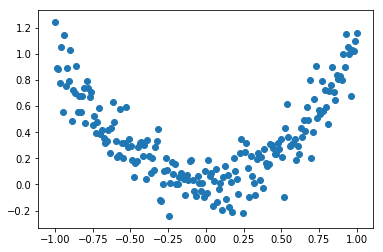

In [39]:
# random seed
tf.set_random_seed(1)
np.random.seed(1)

# fake data
x = np.linspace(-1,1,200)[:,np.newaxis]   # shape(100,1)
noise = np.random.normal(0,0.15, size=x.shape)
y = np.power(x,2) + noise
plt.scatter(x,y)
plt.show()

## define variables and loss

In [40]:
tf_x = tf.placeholder(tf.float32,x.shape)
tf_y = tf.placeholder(tf.float32,y.shape)

# neural network Layers
hd = tf.layers.dense(tf_x,10,tf.nn.relu)
output = tf.layers.dense(hd,1)

loss = tf.losses.mean_squared_error(tf_y,output)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)
train_op = optimizer.minimize(loss)

sess = tf.Session()
sess.run(tf.global_variables_initializer())
plt.ion()

## iteration

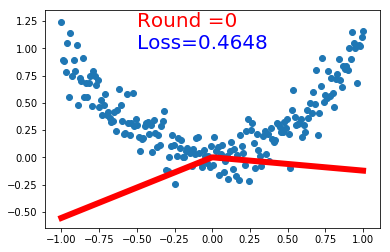

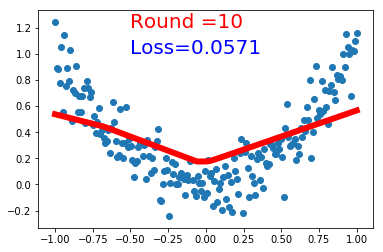

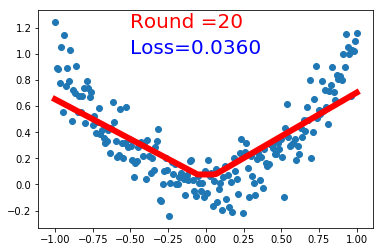

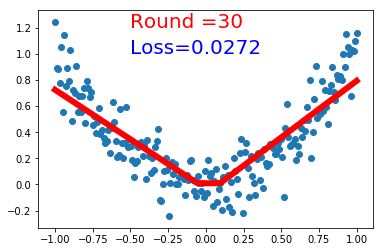

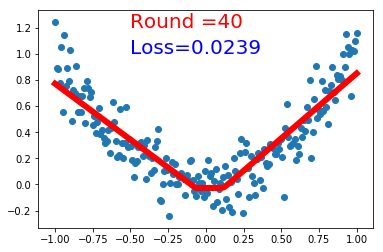

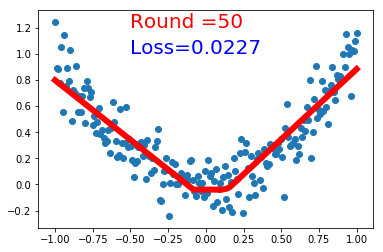

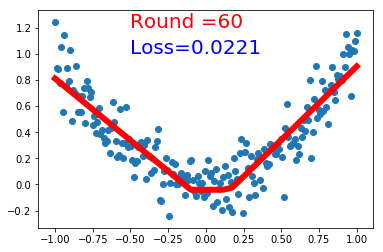

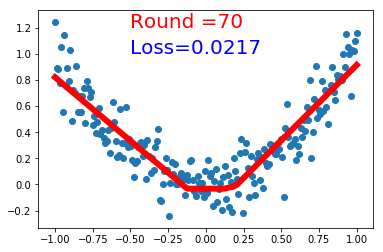

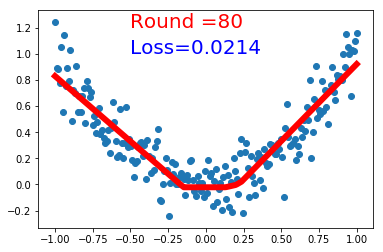

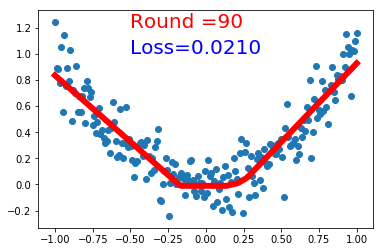

In [41]:
count = 1
for step in range(100):
    _, l,pred = sess.run([train_op,loss,output],{tf_x:x,tf_y:y})
    
    if step % 10 == 0:
        plt.cla()
        plt.scatter(x,y)
        plt.plot(x,pred,'r-',lw=6)
        plt.text(-0.5, 1.2, 'Round =%d'  % step , fontdict={'size': 20, 'color': 'red'})
        plt.text(-0.5, 1, 'Loss=%.4f'  % l , fontdict={'size': 20, 'color': 'Blue'})
        plt.pause(0.1)
        plt.savefig('C:/Users/aup67/Python/images/abc' + str(count) + '.png')
        plt.ioff()
        plt.show()
        count = count + 1 
        

In [ ]:
stop = timeit.default_timer()
print(str(round(stop - start,2)) + 's')